# Lesson 1: Working with Data from TNC S3

**Objective:** Interact with geospatial dataset stored within TNC's AWS cloud storage service, `S3` buckets.

### Amazon Web Services

[Amazon Web Services, AWS](https://aws.amazon.com/) is an industry standard provider of cloud compute and storage services. AWS provides services for [storage (`S3`)](https://aws.amazon.com/pm/serv-s3), [data analysis (such as the `SageMaker`](https://aws.amazon.com/sagemaker/) instance being used here), and [traditional relational database deployments (`RDS`)](https://aws.amazon.com/rds/) amongst numerous other offerings.

At TNC, with regards to Geospatial use cases, AWS powers our Remote Desktop Nimbus (aka GeoCloud) environments and Lacus EO storage bucket, as examples.

### S3 Buckets Overview

S3 bucket contents are similar to a local file system structure with slightly different terminology. All files are referred to as `objects` in an S3 bucket. Objects can be grouped together using `prefixes` which act similarly to folders.

We can view the contents of an S3 bucket that we have permissions for in a few different ways including, python, the command line (CLI), or via a web UI console. **For this exercise, we'll be using the CLI utility.** Please see the `Additional Resources` section below for supplementary info on accessing S3 via all of these modes.

**Costs:** AWS S3 costs depend on a few different factors. Full pricing information can be found on [AWS' S3 Pricing page](https://aws.amazon.com/s3/pricing/). Currently (Feb 2026), TNC IT is covering costs of Sagemaker and S3 storage. In general though:
- There is a monthly charge for storing data in an S3 bucket (a few US cents per GB stored.
- There is a charge per HTTP call e.g `PUT`/`COPY`/`GET` (fractions of a cent per 1,000 calls).
- There is no charge for uploading data into an S3 bucket.
- There is a charge (centers per GB) if a user on the outside internet requests data from an S3 bucket.
  - In our Sagemaker configuration however, our S3 bucket exists within the same AWS region, and no "outbound" data transfer charges are incurred.

## Step 1: View Contents of an Existing S3 Bucket

When working with data in SageMaker on AWS, it's a standard practice to store working data within an S3 bucket.

For this workshop, we've got a pre-created S3 Bucket setup with TNC's `Countries Where We Work` dataset, which is [publicly available on ArcGIS Online](https://tnc.maps.arcgis.com/home/item.html?id=731eb31a47dc49deae39c00379525f5e).

- **S3 Bucket Name:** `<TO BE DETERMINED>`
- **Dataset Name:** `tnc_countries.geojson`

From this notebook, we'll use the aws cli (command line) utility to view the contents of the bucket.

### View Source Data Bucket Contents

Run the command in the following cell to list the bucket's contents. We'll be looking at a specific prefix (subdir) called `ocs-intermediate-workshop-2026`.

**Note:** The `!` allows us to directly run the pre-installed `aws` command line utility, in the notebook cell, as opposed to a python code snippet.

In [ ]:
! aws s3 ls s3://<TO_BE_DETERMINED>/

                           PRE advanced/
                           PRE intermediate/


Above, we see lines representing two prefixes (folders) in our bucket. Let's take a look at the `intermediate` prefix.

In [ ]:
! aws s3 ls --human-readable --recursive s3://<TO_BE_DETERMINED>/intermediate/

2026-01-02 22:58:12    0 Bytes intermediate/
2026-01-02 22:58:20   19.8 MiB intermediate/tnc_countries.geojson


We can see the bucket's `intermediate` prefix contains a geojson export of our dataset of interest `tnc_countries.geojson`. The `--human-readable` flag has converted the size into a more easy to understand `19.8 MiB` units. The `--recursive` flag would traverse additional subdirectories if they existed.

### View `Users` Prefix Contents

Sagemaker users have read/write access to another general purpose bucket `<TO_BE_DETERMINED>`, and can alter data as needed. Unless explicitly granted, access is restricted to most other buckets within TNC.

Within the `sagemaker-gst-state.data` bucket, we've created an `ocs-intermediate-workshop-2026` prefix that has been pre-populated with child prefixes for each workshop participant.

Currently these permissions allow users to modify any folder within this directory, so keep that in mind you could accidentally delete someone else's data.

Execute the command below to view the list of child prefixes and confirm that your name appears.

In [4]:
! aws s3 ls --human-readable s3://sagemaker-gst-stage.data/ocs-intermediate-workshop-2026/

                           PRE matthew.kenny/
2026-01-02 22:55:31    0 Bytes 


**I DON'T SEE MY NAME?:** If you don't see your name in the list, you can create a new prefix (directory) by running the following command replacing `<your-user-name>` with your normal username.

In [28]:
## NOTE: Only run if you didn't see a directory with your name above.
!touch empty.txt
!aws s3 cp empty.txt s3://sagemaker-gst-stage.data/ocs-intermediate-workshop-2026/<your-user-name>/empty.txt

/bin/bash: line 1: your-user-name: No such file or directory


## Step 2: Copy S3 Data to Your S3 Working Prefix

Noting our user-specific working prefix, let's copy our data from the source s3 bucket prefix `<TO_BE_DETERMINED>` to the destination s3 bucket prefix `<TO_BE_DETERMINED>`.

Edit the cell below with your user-specific prefix name and execute it.

In [ ]:
## NOTE: Remember to update <your-user-name>
!aws s3 cp  s3://<TO_BE_DETERMINED>/intermediate/tnc_countries.geojson s3://sagemaker-gst-stage.data/ocs-intermediate-workshop-2026/matthew.kenny/tnc_countries.geojson

copy: s3://tnc-ocs-workshop-2026-source-data/intermediate/tnc_countries.geojson to s3://sagemaker-gst-stage.data/ocs-intermediate-workshop-2026/matthew.kenny/tnc_countries.geojson


## Step 3: Inspect Our Dataset

Let's use the Python [`geopandas` library](https://geopandas.org/en/stable/index.html) to visualize our dataset directly from S3 as a map.

Modify the cell below to replace the value of `user_name` with your user-specific prefix name from the previous step.

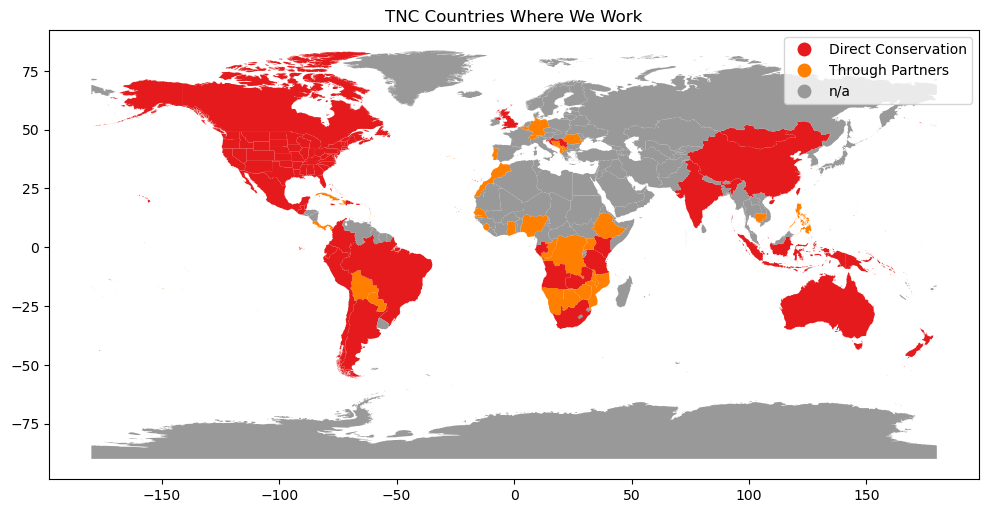

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace "your_user_name" with your own prefix
user_name = "your_user_name"

gdf = gpd.read_file(f"s3://<TO_BE_DETERMINED>/ocs-intermediate-workshop-2026/{user_name}/tnc_countries.geojson")
gdf.plot(column='Work_Type', cmap='Set1', legend=True, figsize=(12, 8))
plt.title('TNC Countries Where We Work')
plt.show()

## Conclusions

We've demonstrated the following concept in this workbook:
- In AWS S3 bucket terminology, `files` are referred to as `objects`. Objects can be grouped by `prefixes` similar to `folders`.
- AWS provides both command line and python packages for interacting with S3 buckets.
- Within the Sagemaker environment, we can interact with data remotely on S3. No need to pull it down to our local workstation (or even Sagemaker's local storage).

## Additional Resources

- [AWS Skill Builder](https://skillbuilder.aws/): This training portal provided by AWS contains self-paced training modules for all of AWS' cloud storage and compute services. While many of the courses are behind a paywall, many of the introductory courses are free to access. Use the web application's filtering function to focus your search, for example to [`Free` courses of the `Fundamental` skill level focused on `Data analytics`](https://skillbuilder.aws/category/domain/data-analytics?page=1&accessTier=free&courseLevel=fundamental)
- [AWS CLI S3 Commands Reference](https://docs.aws.amazon.com/cli/v1/userguide/cli-services-s3-commands.html): Nicely organized examples. For the older `1.X` version of the AWS CLI, but still applicable.
- [AWS CLI S3 Latest Docs](https://docs.aws.amazon.com/cli/latest/reference/s3/): The official manual for the AWS CLI S3 utility. See the list of [available commands](https://docs.aws.amazon.com/cli/latest/reference/s3/#available-commands) for further information.
- [Amazon S3 examples using SDK for Python (Boto3)](https://docs.aws.amazon.com/code-library/latest/ug/python_3_s3_code_examples.html): Numerous examples for using **Python** to interact with S3 buckets using the official `boto3` python package.